# 03 — Artificial Neuron: Forward Pass

Purpose: implement the forward pass of a single unit (affine + activation), understand the role of bias, and visualize how weights and bias move a decision boundary.

## Learning goals
- Compute `z = xW + b` and `a = f(z)` with correct shapes.
- Interpret `W` as orientation and `b` as shift.
- Understand why the input layer has no weights/bias (it is data, not a transform).

## Prerequisites
- Notebook 00 shape conventions.
- Dot product intuition.
- Basic plotting.

## Key ideas
- One unit computes a score (logit) then optionally squashes it.
- Bias moves the boundary without rotating it.
- A unit is a small, testable function; treat it like a production component.

## Minimal theory
- Affine: `z = xW + b`.
- Sigmoid maps logits to `(0,1)` and is often used to model a probability-like score.
- A linear threshold boundary in 2D is a line: `xW + b = 0`.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

SEED = 42
rng = np.random.default_rng(SEED)

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Synthetic linearly separable data
N = 300
x = rng.normal(0, 1.0, size=(N, 2))
true_W = np.array([[1.2], [-0.9]])
true_b = np.array([[0.2]])
logits = x @ true_W + true_b
y = (logits > 0).astype(float)

print('x shape:', x.shape)
print('y shape:', y.shape)

x shape: (300, 2)
y shape: (300, 1)


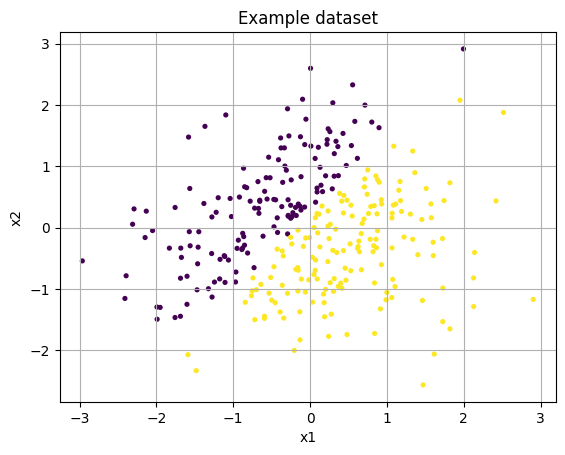

In [6]:
plt.scatter(x[:,0], x[:,1], c=y[:,0], s=14, edgecolors='none')
plt.title("Example dataset")
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()


## Step-by-step experiments
1. Implement a forward pass function (affine + sigmoid).
2. Visualize how changing `W` rotates a boundary.
3. Visualize how changing `b` shifts a boundary.
4. Plot logits and activations to see the squashing effect.

In [7]:
def forward_single_unit(x, W, b):
    z = x @ W + b
    a = sigmoid(z)
    return z, a

W = np.array([[1.0], [-1.0]])
b = np.array([[0.0]])

z, a = forward_single_unit(x, W, b)
print('W shape:', W.shape, 'b shape:', b.shape)
print('z shape:', z.shape, 'a shape:', a.shape)
print('z range:', (z.min(), z.max()))
print('a range:', (a.min(), a.max()))

W shape: (2, 1) b shape: (1, 1)
z shape: (300, 1) a shape: (300, 1)
z range: (np.float64(-3.0575434475074514), np.float64(4.076633798065749))
a range: (np.float64(0.04489291630262416), np.float64(0.9833185171119107))


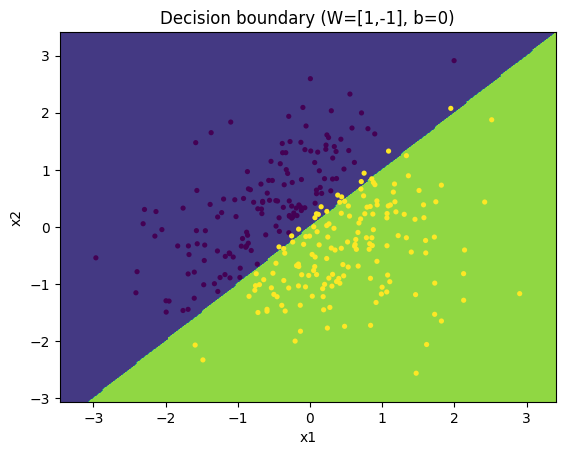

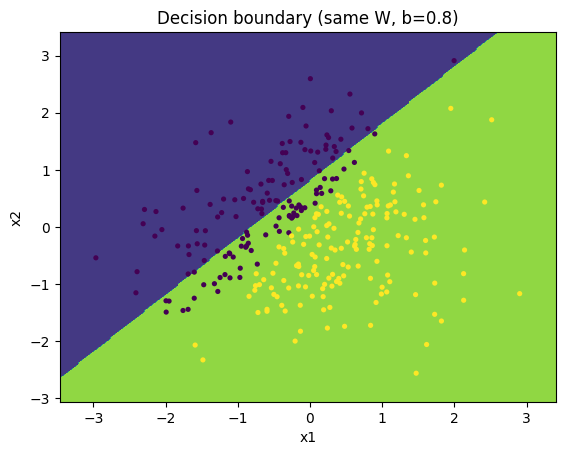

In [11]:
def plot_boundary(x, y, W, b, title):
    x1_min, x1_max = x[:,0].min()-0.5, x[:,0].max()+0.5
    x2_min, x2_max = x[:,1].min()-0.5, x[:,1].max()+0.5
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 250), np.linspace(x2_min, x2_max, 250))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    z = (grid @ W + b).reshape(xx1.shape)
    plt.figure()
    plt.contourf(xx1, xx2, z > 0, levels=2)
    plt.scatter(x[:,0], x[:,1], c=y[:,0], s=14, edgecolors='none')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

# Plot 1: rotation by changing W
plot_boundary(x, y, np.array([[1.0], [-1.0]]), np.array([[0.0]]), 'Decision boundary (W=[1,-1], b=0)')

# Plot 2: shift by changing b
plot_boundary(x, y, np.array([[1.0], [-1.0]]), np.array([[0.8]]), 'Decision boundary (same W, b=0.8)')

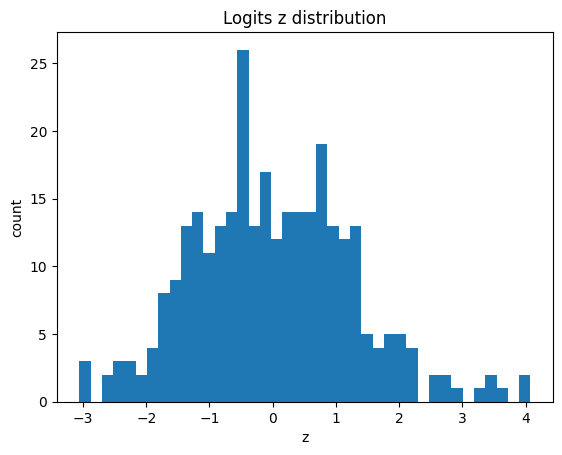

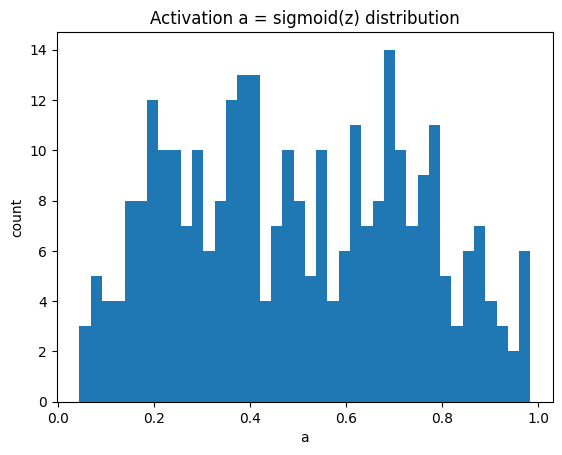

In [12]:
# Plot logits vs activation (two plots)
z, a = forward_single_unit(x, np.array([[1.0], [-1.0]]), np.array([[0.0]]))

plt.figure()
plt.hist(z[:,0], bins=40)
plt.title('Logits z distribution')
plt.xlabel('z')
plt.ylabel('count')
plt.show()

plt.figure()
plt.hist(a[:,0], bins=40)
plt.title('Activation a = sigmoid(z) distribution')
plt.xlabel('a')
plt.ylabel('count')
plt.show()

## Reflection questions
1. What does changing `b` do geometrically?
2. Why is bias critical even if you have multiple inputs?
3. If you remove sigmoid and threshold `z` directly, what changes operationally?
4. Why does the input layer have no `W`/`b`?
5. When might you prefer to work with logits instead of probabilities?

## Optional extensions
1. Try `W=[2,2]` and interpret the boundary.
2. Plot a calibration-style curve: `z` vs `a` on a grid.
3. Add Gaussian noise to `x` and see how the boundary errors increase.

## Summary
- A unit is `z = xW + b`, optionally followed by an activation.
- `W` controls orientation; `b` controls translation.
- Shapes are the contract: `(N,D)@(D,1)+(1,1)=(N,1)`.
- Visual boundaries make mistakes obvious.
- Logits and activations serve different practical roles.